In [1]:
# The following codes are borrowed from https://qiita.com/Hawaii/items/53efe3e96b1171ebc7db 
# pandas for Data structure "dataframe"
# numpy for matrix-like data structure
# sklearn for machine learning
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

###########
from sklearn.ensemble import RandomForestClassifier

In [2]:
# To make an image of "decision-tree" and display
# Non-python application "Graphviz" is required
import graphviz # this python package "graphviz" connects NON-python application "Graphviz" into python environment
import pydotplus # python package to assist Graphviz functionality
from IPython.display import Image # something to show the image in jupyter notebook 
from sklearn.externals.six import StringIO # something to show the image in jupyter notebook (environment dependency is likely) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
data = pd.DataFrame({
        "buy(y)":[True,True,True,True,True,True,True,False,False,False,False,False,False],
        "high":[4, 5, 3, 1, 6, 3, 4, 1, 2, 1, 1,1,3],
        "size":[30, 45, 32, 20, 35, 40, 38, 20, 18, 20, 22,24,25],
        "autolock":[1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,1,0]
    })

In [4]:
y = data.loc[:,["buy(y)"]]
X = data.loc[:,["high", "size","autolock"]]

In [5]:
#clf = DecisionTreeClassifier()
#clf.fit(X,y)
#clf = clf.fit(X, y)

############
clf = RandomForestClassifier()
clf.fit(X,y)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
# Mac
dot_data = StringIO() # "dot-format" information for "tree-graph" will be stocked
export_graphviz(clf, out_file=dot_data,  
                     feature_names=["high", "size","autolock"], 
                     class_names=["False","True"],  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.progs = {'dot': u"C:\\tools\\Anaconda3\\Library\\bin\\dot.bat"}  # 追加部分

Image(graph.create_png())

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

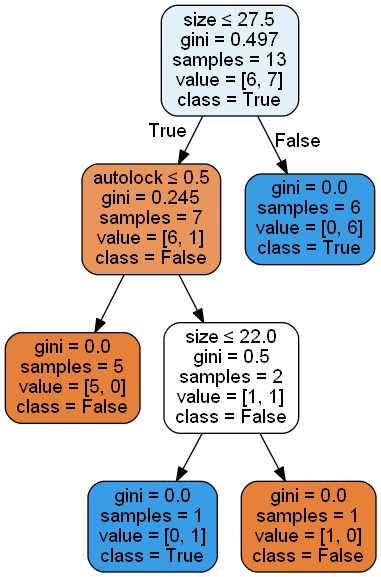

In [7]:
# Windows
dot_data = StringIO() # "dot-format" information for "tree-graph" will be stocked
export_graphviz(clf, out_file=dot_data,  
                     feature_names=["high", "size","autolock"], 
                     class_names=["False","True"],  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.progs = {'dot': u"C:\\tools\\Anaconda3\\Library\\bin\\dot.bat"}  # Windows
#C:\tools\Anaconda3\Library\bin\dot.bat

Image(graph.create_png())

In [8]:
graph.write("out.dot")

True

In [9]:
export_graphviz(clf, out_file=dot_data,  
                     feature_names=["high", "size","autolock"], 
                     class_names=["False","True"],  
                     filled=True, rounded=True,  
                     special_characters=True) 

In [34]:
help(graph)

Help on Dot in module pydotplus.graphviz object:

class Dot(Graph)
 |  Dot(*argsl, **argsd)
 |  
 |  A container for handling a dot language file.
 |  
 |  This class implements methods to write and process
 |  a dot language file. It is a derived class of
 |  the base class 'Graph'.
 |  
 |  Method resolution order:
 |      Dot
 |      Graph
 |      Common
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, *argsl, **argsd)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setstate__(self, state)
 |  
 |  create(self, prog=None, format='ps')
 |      Creates and returns a Postscript representation of the graph.
 |      
 |      create will write the graph to a temporary dot file and process
 |      it with the program given by 'prog' (which defaults to 'twopi'),
 |      reading the Postscript output and returning it as a string is the
 |      operation is successful.
 |      On failure None is return

In [10]:
graph.to_string()

'digraph Tree {\nnode [color="black", fontname=helvetica, shape=box, style="filled, rounded"];\nedge [fontname=helvetica];\n0 [fillcolor="#399de524", label=<size &le; 27.5<br/>gini = 0.497<br/>samples = 13<br/>value = [6, 7]<br/>class = True>];\n1 [fillcolor="#e58139d4", label=<autolock &le; 0.5<br/>gini = 0.245<br/>samples = 7<br/>value = [6, 1]<br/>class = False>];\n0 -> 1  [headlabel="True", labelangle=45, labeldistance="2.5"];\n2 [fillcolor="#e58139ff", label=<gini = 0.0<br/>samples = 5<br/>value = [5, 0]<br/>class = False>];\n1 -> 2;\n3 [fillcolor="#e5813900", label=<size &le; 22.0<br/>gini = 0.5<br/>samples = 2<br/>value = [1, 1]<br/>class = False>];\n1 -> 3;\n4 [fillcolor="#399de5ff", label=<gini = 0.0<br/>samples = 1<br/>value = [0, 1]<br/>class = True>];\n3 -> 4;\n5 [fillcolor="#e58139ff", label=<gini = 0.0<br/>samples = 1<br/>value = [1, 0]<br/>class = False>];\n3 -> 5;\n6 [fillcolor="#399de5ff", label=<gini = 0.0<br/>samples = 6<br/>value = [0, 6]<br/>class = True>];\n0 -> 6

In [11]:
print(graph.to_string())

digraph Tree {
node [color="black", fontname=helvetica, shape=box, style="filled, rounded"];
edge [fontname=helvetica];
0 [fillcolor="#399de524", label=<size &le; 27.5<br/>gini = 0.497<br/>samples = 13<br/>value = [6, 7]<br/>class = True>];
1 [fillcolor="#e58139d4", label=<autolock &le; 0.5<br/>gini = 0.245<br/>samples = 7<br/>value = [6, 1]<br/>class = False>];
0 -> 1  [headlabel="True", labelangle=45, labeldistance="2.5"];
2 [fillcolor="#e58139ff", label=<gini = 0.0<br/>samples = 5<br/>value = [5, 0]<br/>class = False>];
1 -> 2;
3 [fillcolor="#e5813900", label=<size &le; 22.0<br/>gini = 0.5<br/>samples = 2<br/>value = [1, 1]<br/>class = False>];
1 -> 3;
4 [fillcolor="#399de5ff", label=<gini = 0.0<br/>samples = 1<br/>value = [0, 1]<br/>class = True>];
3 -> 4;
5 [fillcolor="#e58139ff", label=<gini = 0.0<br/>samples = 1<br/>value = [1, 0]<br/>class = False>];
3 -> 5;
6 [fillcolor="#399de5ff", label=<gini = 0.0<br/>samples = 6<br/>value = [0, 6]<br/>class = True>];
0 -> 6  [headlabel="Fa